In [1]:
import os 
import sys
path= os .path.abspath('../')
print(path)
if path not in sys.path:
   sys .path.append(path)

d:\Desktop\data


In [2]:
from src . data_preprocessor import Datapreprocessor

In [3]:
data = Datapreprocessor()

In [4]:
dataset = data.load_data('../Diabetes Missing Data.csv')

In [5]:
data.explore_data(dataset)


--- Dataset Overview ---
   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-n

In [6]:
data.identify_issues(dataset)


--- Biological Impossibilities (Zeros) ---
Glucose: 0 zeros
BMI: 0 zeros

--- Data Types ---
Pregnant               int64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object

--- Potential Outliers (IQR method) ---
Glucose: 0 potential outliers
BMI: 8 potential outliers



--- Missing Value Percentages ---
Pregnant              0.00
Glucose               0.65
Diastolic_BP          4.56
Skin_Fold            29.56
Serum_Insulin        48.70
BMI                   1.43
Diabetes_Pedigree     0.00
Age                   0.00
Class                 0.00
dtype: float64

--- Missing Data Matrix ---


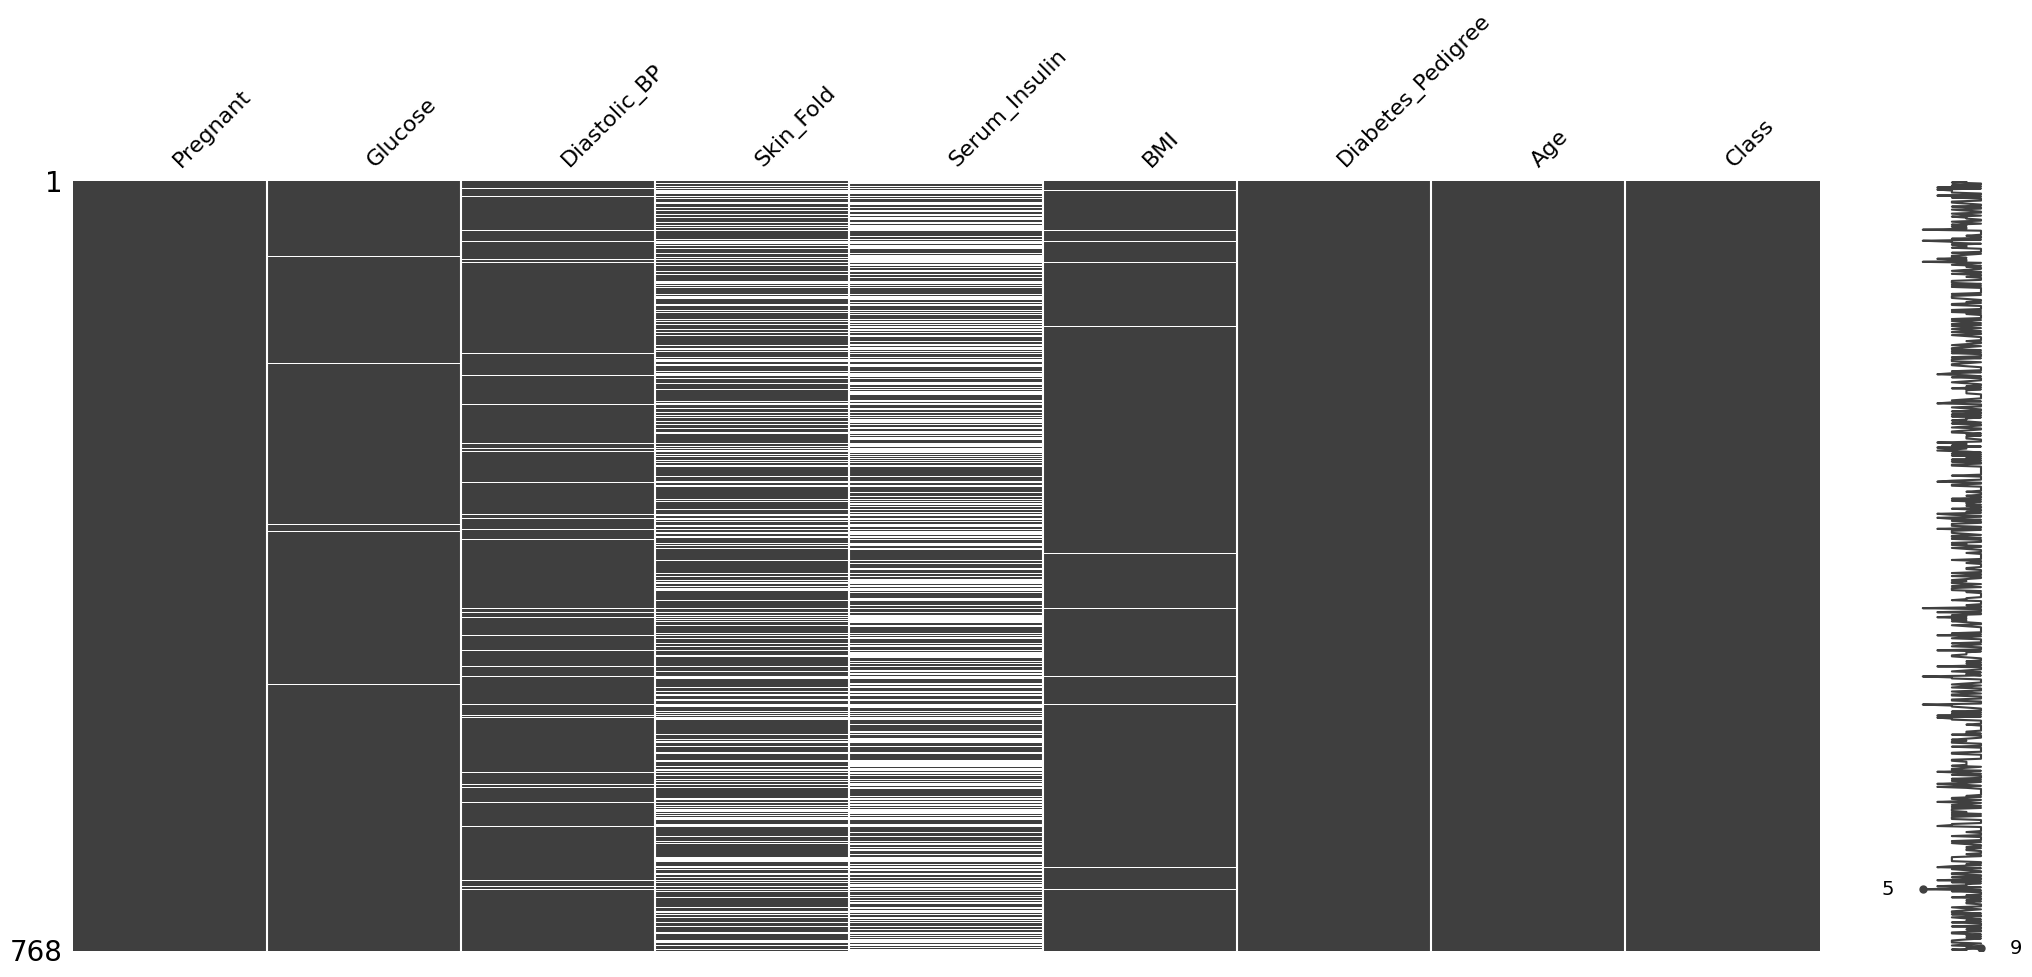


--- Missing Data Heatmap ---


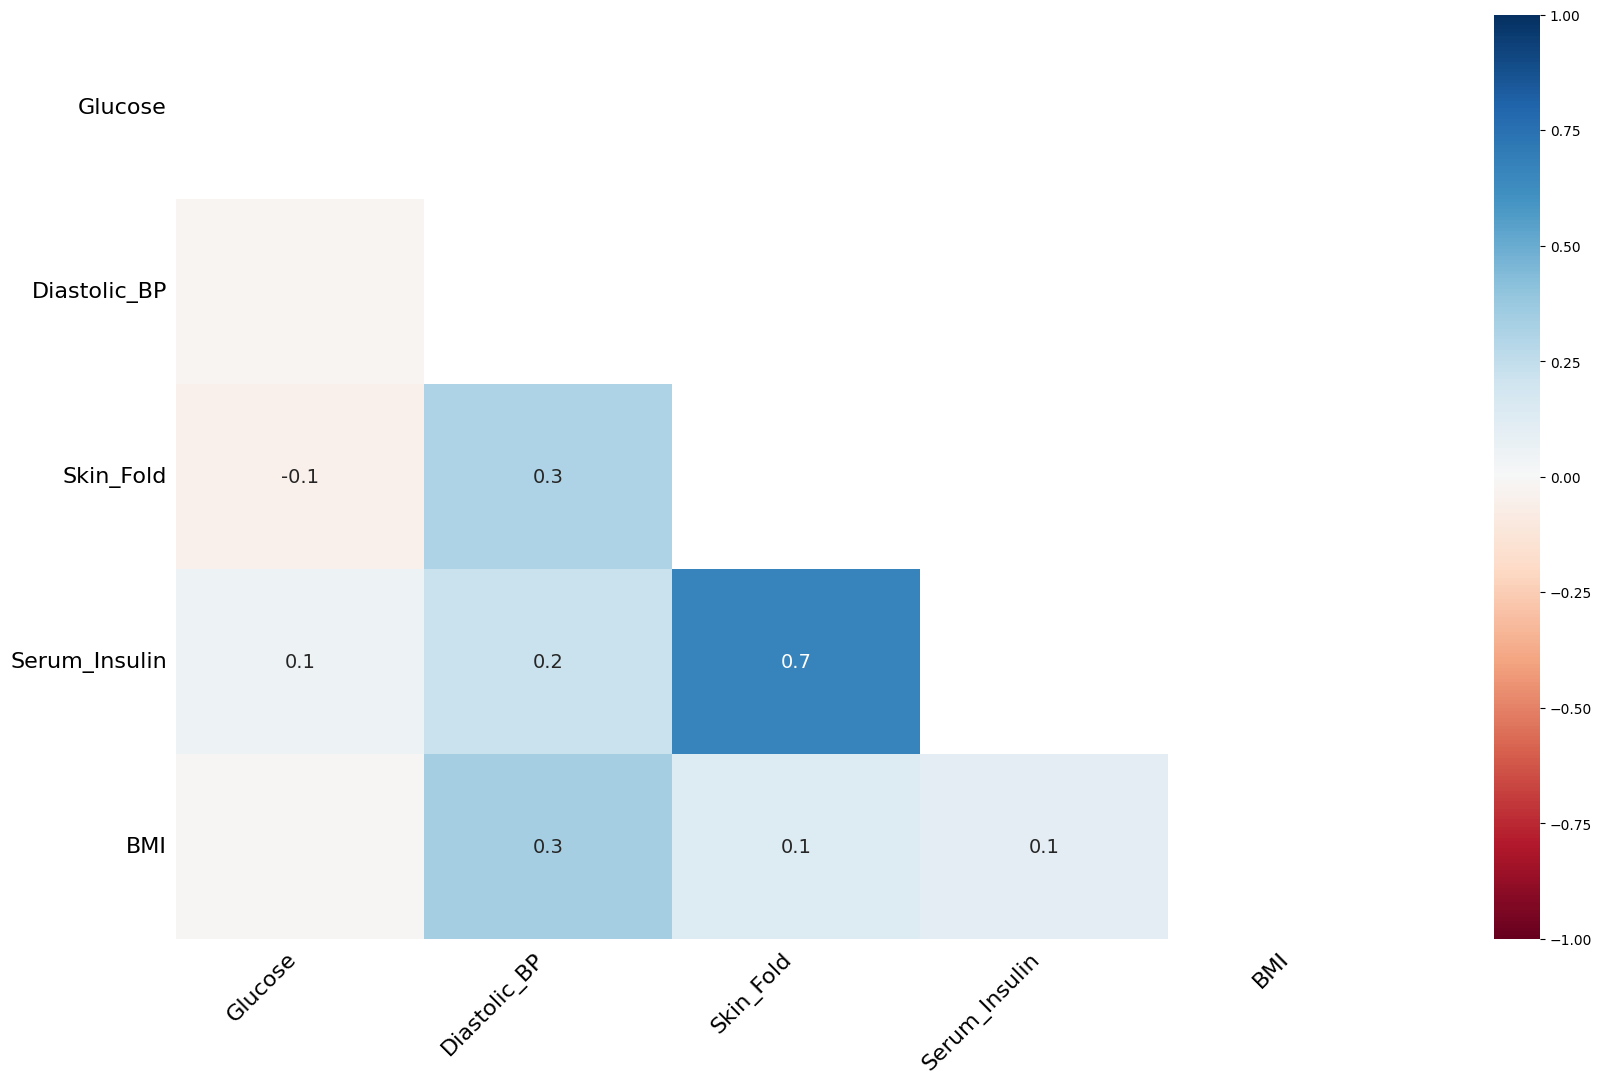

In [7]:
dataset = data.missing_value_analysis(dataset)


In [8]:
dataset = data.impute_missing(dataset, strategy='median')

In [9]:
dataset = data.feature_engineering(dataset)


In [10]:
dataset = data.encode_features(dataset)

In [11]:
dataset = data.scale_features(dataset, method='standard')

In [12]:
print(dataset.head())

   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0  0.639947  0.866045     -0.031990   0.670643      -0.181541  0.166619   
1 -0.844885 -1.205066     -0.528319  -0.012301      -0.181541 -0.852200   
2  1.233880  2.016662     -0.693761  -0.012301      -0.181541 -1.332500   
3 -0.844885 -1.073567     -0.528319  -0.695245      -0.540642 -0.633881   
4 -1.141852  0.504422     -2.679076   0.670643       0.316566  1.549303   

   Diabetes_Pedigree       Age     Class  AgeGroup  BMICategory  \
0           0.468492  1.425995  1.365896 -1.399192    -0.180863   
1          -0.365061 -0.190672 -0.732120  0.743539     1.453287   
2           0.604397 -0.105584  1.365896  0.743539    -1.815013   
3          -0.920763 -1.041549 -0.732120  0.743539     1.453287   
4           5.484909 -0.020496  1.365896  0.743539    -0.180863   

   GlucoseCategory  
0         1.702491  
1        -0.587374  
2         1.702491  
3        -0.587374  
4        -0.587374  


In [13]:
dataset.columns = dataset.columns.str.strip()  # remove any spaces
target_col = dataset.columns[-1]  # last column assumed to be target
print(f"Detected target column: {target_col}")

Detected target column: GlucoseCategory


In [14]:
X = dataset.drop(target_col, axis=1)
y = dataset[target_col]


In [15]:
if y.dtype != int:
    y = y.astype(int)
print(y.dtype, y.unique())

int64 [1 0]


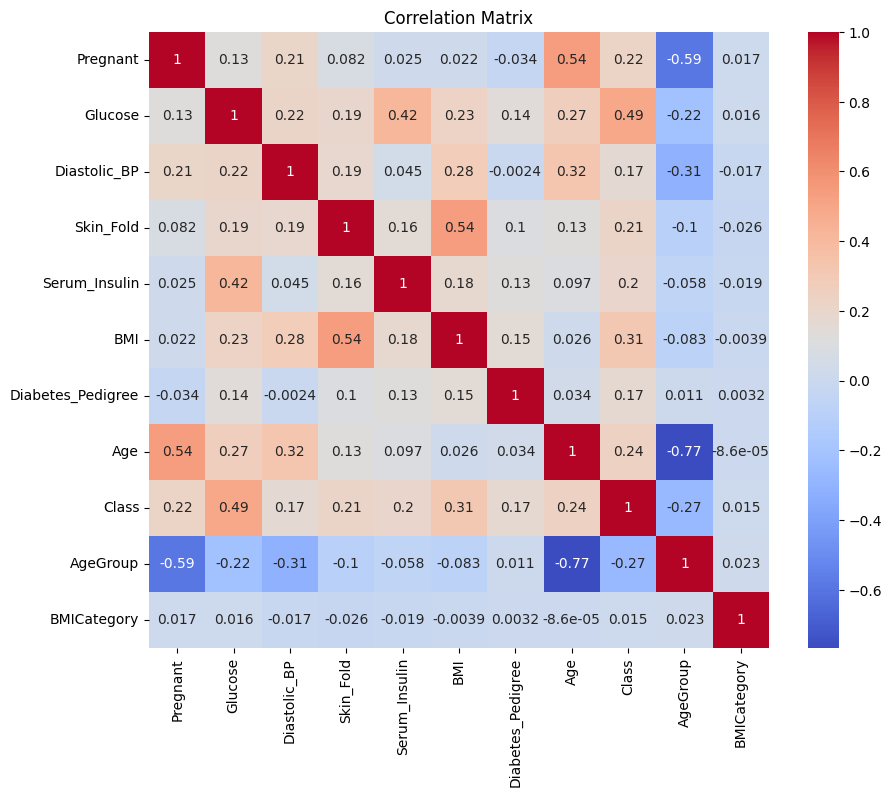

Top 5 features selected by mutual information: ['Pregnant', 'Glucose', 'Diastolic_BP', 'Serum_Insulin', 'Class']


In [16]:
data.correlation_matrix(X)
top_features = data.select_k_best_features(X, y, k=5)
X_selected = X[top_features]

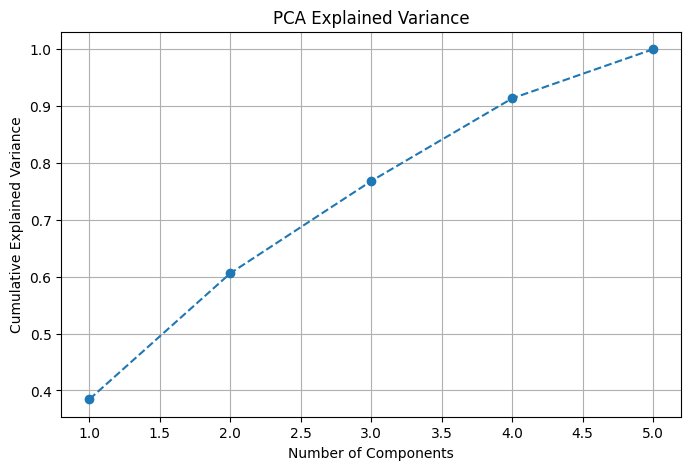

Explained variance by component: [0.38447778 0.22152717 0.16218011 0.14538473 0.08643021]


In [17]:
X_pca, explained_var, cum_var = data.perform_pca(X_selected)

Class distribution:
 GlucoseCategory
0    571
1    197
Name: count, dtype: int64
Imbalance ratio (minority/majority): 0.35


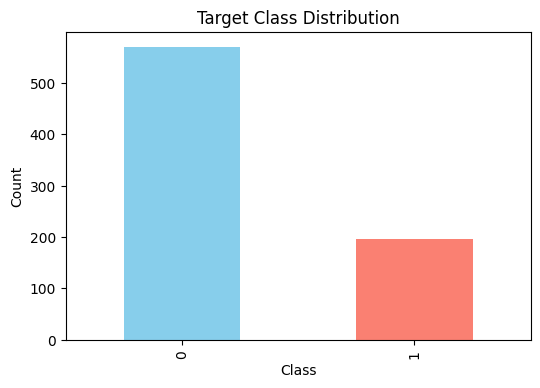

np.float64(0.3450087565674256)

In [18]:
data.analyze_class_distribution(y)

In [19]:
X_balanced, y_balanced = data.balance_data(X_selected, y)

Class distribution after balancing:
 GlucoseCategory
1    571
0    571
Name: count, dtype: int64


In [20]:
data.save_clean_data(dataset, os.path.join(path, "cleaned_diabetes.csv"))


✅ Cleaned data successfully saved to 'd:\Desktop\data\cleaned_diabetes.csv'


In [21]:
# Save the data dictionary alongside your cleaned dataset
data.save_data_dictionary(dataset, os.path.join(path, "data_dictionary.csv"))


✅ Data dictionary successfully saved to 'd:\Desktop\data\data_dictionary.csv'
